In [2]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [3]:
df_at = pd.read_csv('./data/atp/Total.csv')
df_ct = pd.read_csv('./data/challengers/Total.csv')
df_cw = pd.read_csv('./data/challengers/win.csv')

In [4]:
df_at.drop(columns='Unnamed: 0', inplace=True)
df_ct.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df_cw.shape

(5286, 1999)

In [6]:
df_cw = df_cw.rename(columns={'winner_name': 'player_name'})

In [7]:
df_final = pd.merge(df_cw, df_at[['player_name', 'win', 'total_win_percentage']], on='player_name', how='left')

In [8]:
df_final['tour'] = 1

C:\Users\Henry\AppData\Local\Temp/ipykernel_223480/2189794969.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final['tour'] = 1


In [9]:
# Set all pro Tour level as 0
for i in df_final.index:
    if df_final['total_win_percentage'][i] >= 0:
        df_final['tour'][i] = 0

C:\Users\Henry\AppData\Local\Temp/ipykernel_223480/4221000129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['tour'][i] = 0


In [10]:
df_final.fillna(0, inplace=True)

In [11]:
df_final.shape

(5286, 2002)

In [12]:
df_final.head(1)

,player_name,ATP Challenger Tour Finals CH sum,ATP Challenger Tour Finals CH mean,Aachen CH sum,Aachen CH mean,Aarhus CH sum,Aarhus CH mean,Acapulco sum,Acapulco mean,Acapulco CH sum,...,surface_Carpet mean,surface_Clay sum,surface_Clay mean,surface_Grass sum,surface_Grass mean,surface_Hard sum,surface_Hard mean,win,total_win_percentage,tour
0,A Aguilar,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1


### Regression Model

In [12]:
X = df_final.drop(columns=['win', 'player_name', 'total_win_percentage', 'tour'])
y = df_final['tour']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [13]:
y_train.value_counts(normalize=True)

0    0.544147
1    0.455853
Name: tour, dtype: float64

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test) 

(0.91372351160444, 0.840393343419062)

In [16]:
cross_val_score(logreg, X_train, y_train).mean()

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Henry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8360286343892902

In [17]:
cross_val_score(logreg, X_test, y_test).mean()

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Henry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8071126357918811

---

### RF Model with All Features

In [12]:
X = df_final.drop(columns=['win', 'player_name', 'total_win_percentage', 'tour'])
y = df_final['tour']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [13]:
y.value_counts(normalize=True)  # Baseline

0    0.544268
1    0.455732
Name: tour, dtype: float64

In [14]:
rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)

In [15]:
cross_val_score(rf, X_train, y_train).mean(), cross_val_score(et, X_train, y_train).mean()

(0.8284579719005949, 0.826187155285516)

In [16]:
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])

In [17]:
params = {
    'rf__random_state': [42],
    'rf__n_estimators': [200, 210, 220],
    'rf__max_depth': [60, 65, 70, 75, 80]
}

In [18]:
gs = GridSearchCV(rf_pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8352685110881832


{'rf__max_depth': 70, 'rf__n_estimators': 210, 'rf__random_state': 42}

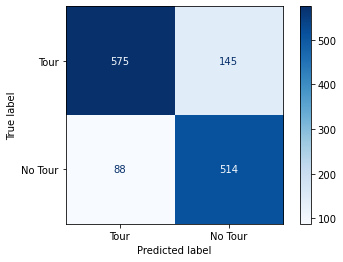

<Figure size 432x288 with 0 Axes>

In [19]:
cm = metrics.plot_confusion_matrix(gs, X_test, y_test, display_labels=['Tour', 'No Tour'], cmap='Blues')
plt.show(cm)
plt.savefig('./images/cm_1.png', bbox_inches='tight')

True Possitive vs True Negative

575 vs 514

---

### Model with Only Total Win/Lost Features

In [14]:
df_merged = pd.merge(df_ct, df_at[['player_name', 'total_win_percentage']], on='player_name', how='left')

In [15]:
df_merged['tour'] = 1

In [16]:
# Set all pro Tour level as 0
for i in df_merged.index:
    if df_merged['total_win_percentage_y'][i] >= 0:
        df_merged['tour'][i] = 0

C:\Users\Henry\AppData\Local\Temp/ipykernel_223480/3567967541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['tour'][i] = 0


In [17]:
df_merged.fillna(0, inplace=True)

In [18]:
df_merged.shape

(9316, 8)

### Regression Model

In [19]:
features = ['win', 'lost']
X = df_merged[features]
y = df_merged['tour']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [20]:
y.value_counts(normalize=True)  # Baseline

1    0.662516
0    0.337484
Name: tour, dtype: float64

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [22]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test) 

(0.829683698296837, 0.8299699441820524)

In [23]:
cross_val_score(logreg, X_train, y_train).mean()

0.8299691859625623

In [24]:
cross_val_score(logreg, X_test, y_test).mean()

0.8291162490193363

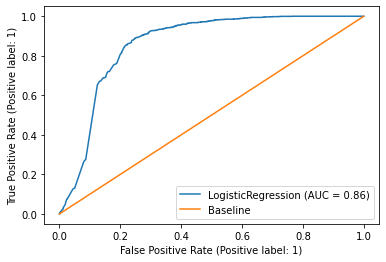

In [25]:
metrics.plot_roc_curve(logreg, X_test, y_test)
plt.plot([0,1], [0,1], label='Baseline')
plt.legend();

In [26]:
metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

0.8598385716335284

### RF Model

In [27]:
rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)

In [28]:
cross_val_score(rf, X_train, y_train).mean(), cross_val_score(et, X_train, y_train).mean()

(0.8263926480512606, 0.8266790783028828)

In [29]:
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])

In [33]:
params = {
    'rf__random_state': [42],
    'rf__n_estimators': [200, 210, 220],
    'rf__max_depth': [4, 5, 6, 7, 8]
}

In [34]:
gs = GridSearchCV(rf_pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8435646383062828


{'rf__max_depth': 6, 'rf__n_estimators': 210, 'rf__random_state': 42}

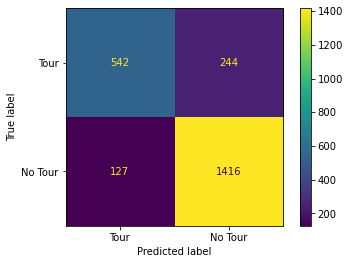

<Figure size 432x288 with 0 Axes>

In [35]:
cm = metrics.plot_confusion_matrix(gs, X_test, y_test, display_labels=['Tour', 'No Tour'])
plt.show(cm)
plt.savefig('./images/cm_2.png', bbox_inches='tight')

True Possitive vs True Negative

542 vs 1416

Logistic Regression seems to produce a slightly better results

---